In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import pickle

pickle_in = open("img.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("label.pickle","rb")
y = pickle.load(pickle_in)

y = np_utils.to_categorical(y, 2)


X = X/255.0

print(y[0:10])


[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


Using TensorFlow backend.


In [2]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='drwonsiness_model_v2.h5', verbose=1, save_best_only=True)
                               
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3, callbacks=[checkpointer])

Train on 3392 samples, validate on 1454 samples
Epoch 1/10
3360/3392 [============================>.] - ETA: 0s - loss: 0.5304 - acc: 0.7119
Epoch 00001: val_loss improved from inf to 0.34921, saving model to drwonsiness_model_v2.h5
3392/3392 [==============================] - 23s 7ms/step - loss: 0.5283 - acc: 0.7129 - val_loss: 0.3492 - val_acc: 0.8439
Epoch 2/10
3360/3392 [============================>.] - ETA: 0s - loss: 0.2596 - acc: 0.9015
Epoch 00002: val_loss improved from 0.34921 to 0.19350, saving model to drwonsiness_model_v2.h5
3392/3392 [==============================] - 22s 7ms/step - loss: 0.2584 - acc: 0.9018 - val_loss: 0.1935 - val_acc: 0.9292
Epoch 3/10
3360/3392 [============================>.] - ETA: 0s - loss: 0.1778 - acc: 0.9336
Epoch 00003: val_loss improved from 0.19350 to 0.15688, saving model to drwonsiness_model_v2.h5
3392/3392 [==============================] - 23s 7ms/step - loss: 0.1769 - acc: 0.9340 - val_loss: 0.1569 - val_acc: 0.9381
Epoch 4/10
3360/3

In [ ]:
# model.save('CNN.model')

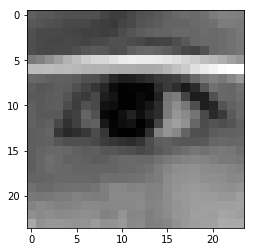

[[[[0.32444444]
   [0.31111111]
   [0.30666667]
   [0.29777778]
   [0.29333333]
   [0.28888889]
   [0.28888889]
   [0.28888889]
   [0.26666667]
   [0.24888889]
   [0.24888889]
   [0.27111111]
   [0.28888889]
   [0.29777778]
   [0.31111111]
   [0.32444444]
   [0.34222222]
   [0.35111111]
   [0.34666667]
   [0.36      ]
   [0.38666667]
   [0.4       ]
   [0.39555556]
   [0.39111111]]

  [[0.30666667]
   [0.29777778]
   [0.28888889]
   [0.28444444]
   [0.27111111]
   [0.27111111]
   [0.27111111]
   [0.25777778]
   [0.24888889]
   [0.24      ]
   [0.26222222]
   [0.27111111]
   [0.29777778]
   [0.30666667]
   [0.31555556]
   [0.33333333]
   [0.33333333]
   [0.33333333]
   [0.34666667]
   [0.35111111]
   [0.36      ]
   [0.38666667]
   [0.38666667]
   [0.38222222]]

  [[0.28888889]
   [0.27555556]
   [0.27555556]
   [0.27111111]
   [0.26666667]
   [0.26222222]
   [0.25333333]
   [0.25777778]
   [0.24888889]
   [0.25333333]
   [0.28      ]
   [0.29777778]
   [0.31555556]
   [0.32888889]
   [

In [17]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("eyeR_open.png",0)
img = img/225
plt.imshow(img, cmap="gray")
plt.show()
img = img.reshape(-1, 24, 24, 1)

print(img)


In [18]:
import time
start = time.time()
y_pred = model.predict(img)
end = time.time()
print("Execution time: " + str(end-start))
print(y_pred)

Execution time: 0.0043756961822509766
[[5.4464945e-05 9.9994552e-01]]


In [19]:
print(max(y_pred[0]))

0.9999455
